In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data = data.drop(['Loan_ID'], axis =1)
data = data.dropna()

In [9]:
data.shape

(480, 12)

In [10]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [12]:
for i in data.columns:
    if data[i].dtypes == 'object':
        data[i] = ord_enc.fit_transform(data[i].values.reshape(-1,1))
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


In [13]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

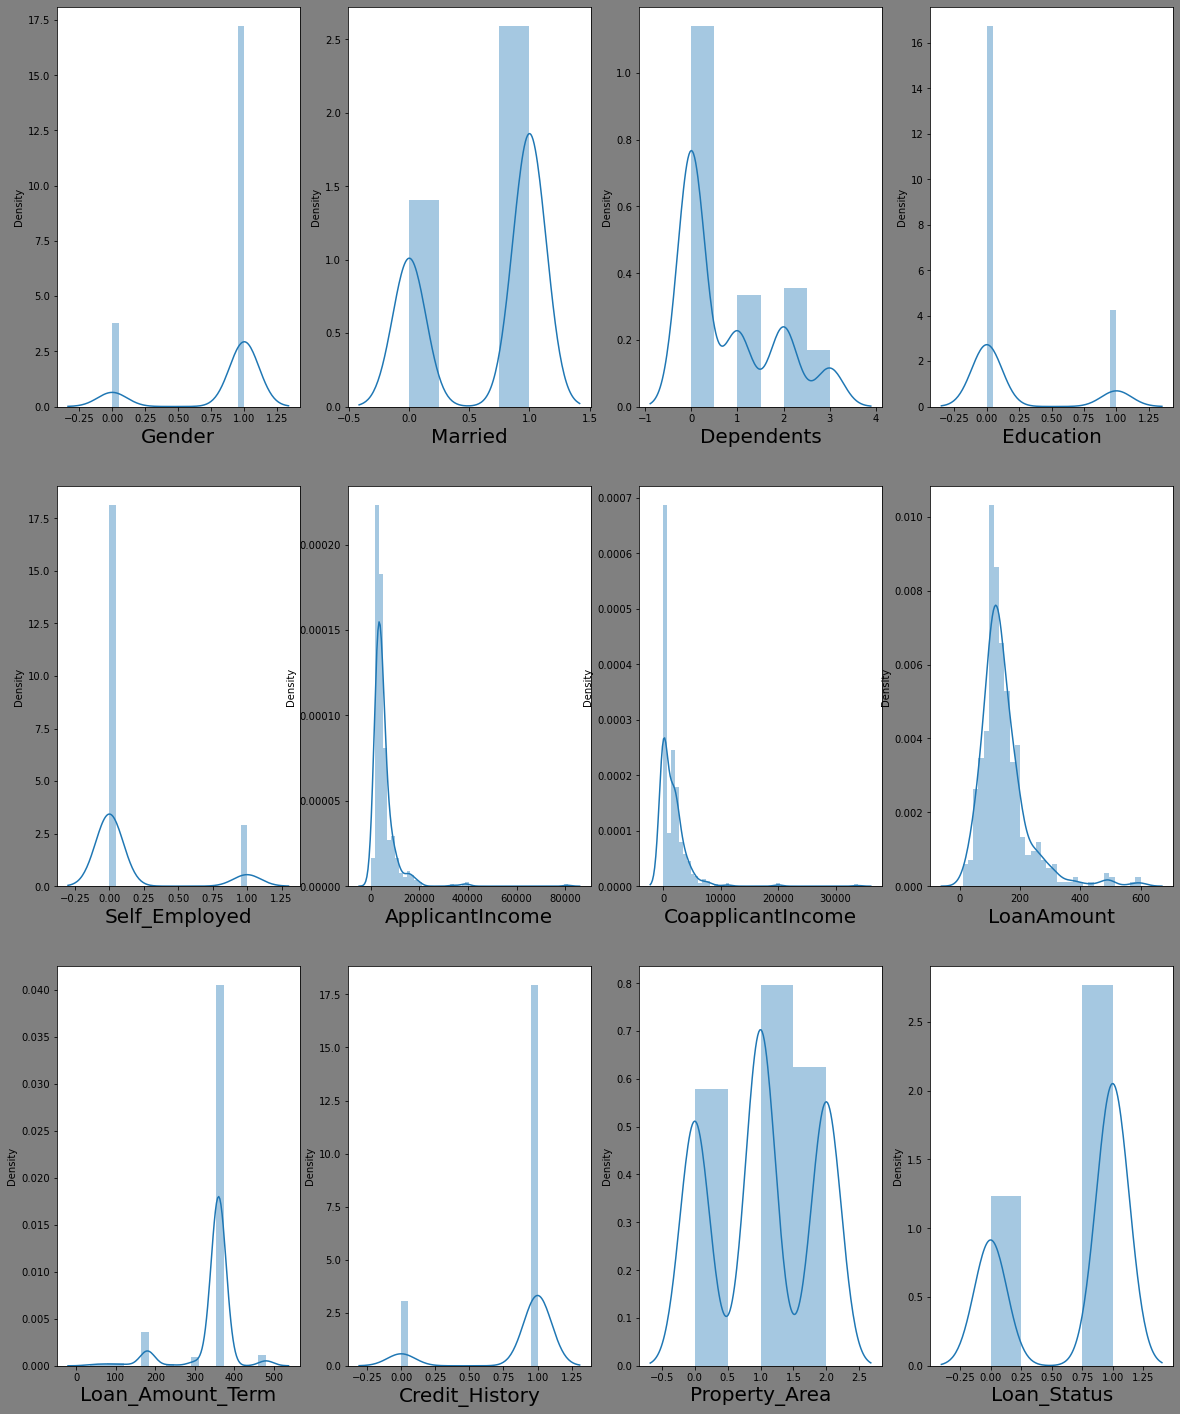

In [15]:
plt.figure(figsize=(20,25),facecolor='grey')
plotnumber = 1
for column in data:
    if plotnumber <14:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [16]:
data.skew()

Gender              -1.678471
Married             -0.621334
Dependents           0.942272
Education            1.488474
Self_Employed        2.111872
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Property_Area       -0.039673
Loan_Status         -0.832681
dtype: float64

In [17]:
data['ApplicantIncome'] = data['ApplicantIncome'].replace(0,data['ApplicantIncome'].mean())
data['CoapplicantIncome'] = data['CoapplicantIncome'].replace(0,data['CoapplicantIncome'].mean())
data['LoanAmount'] = data['LoanAmount'].replace(0,data['LoanAmount'].mean())

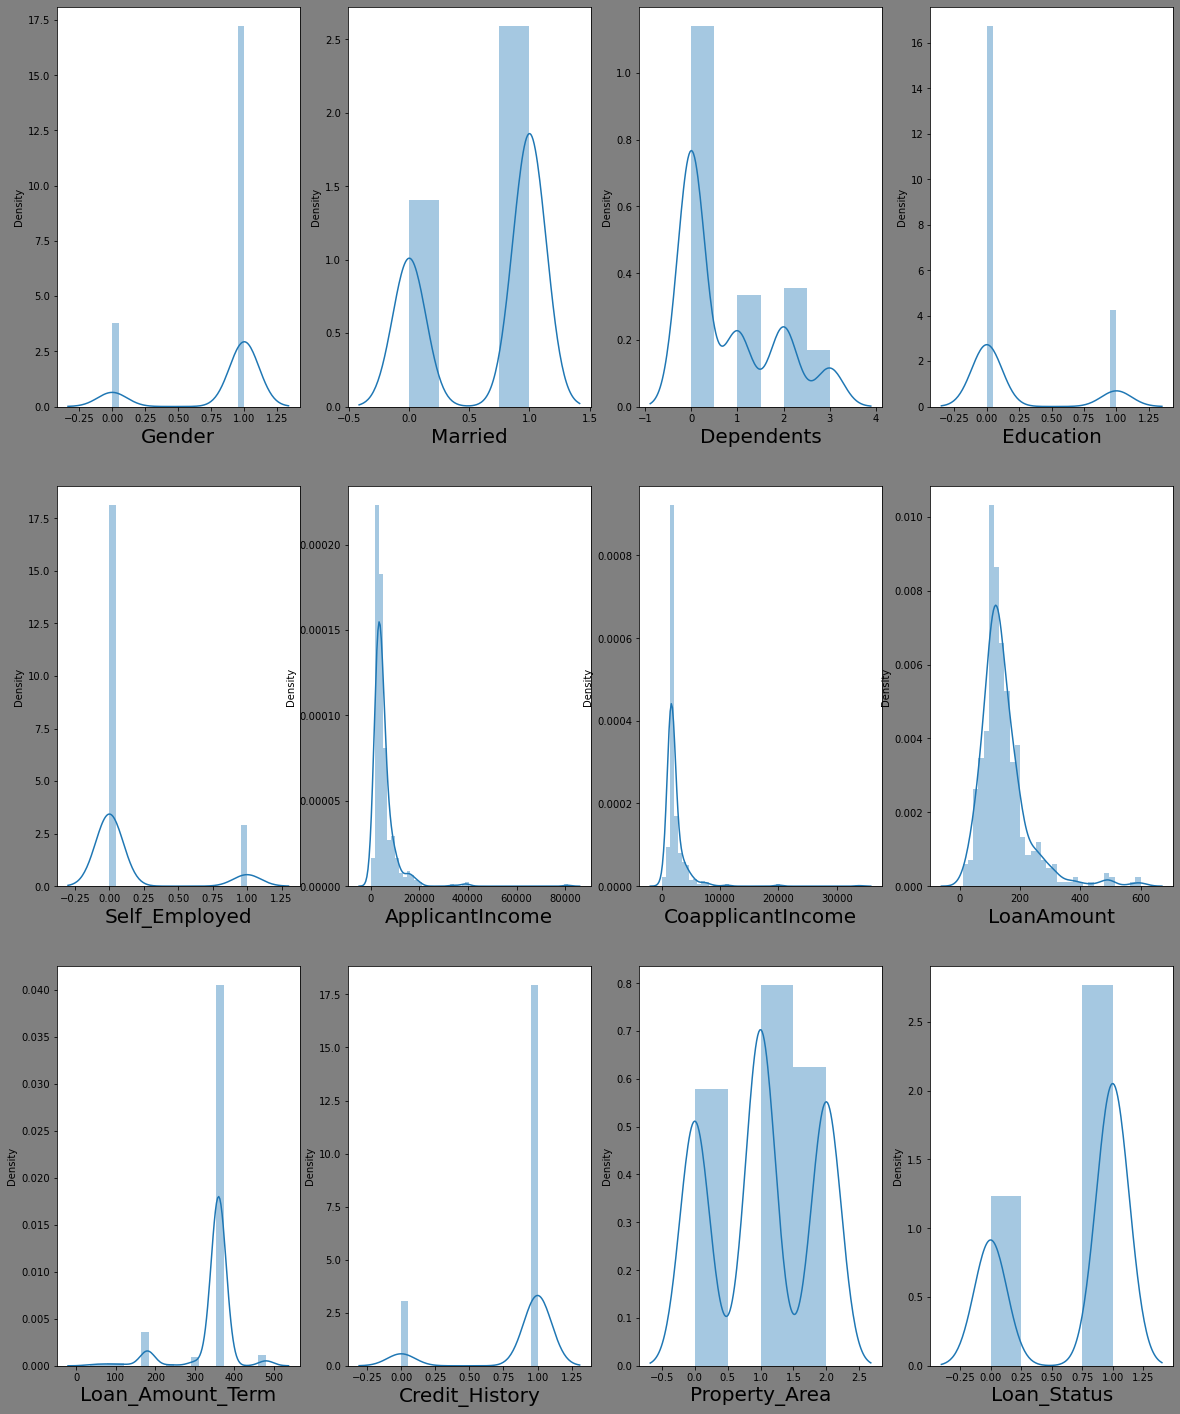

In [18]:
plt.figure(figsize=(20,25),facecolor='grey')
plotnumber = 1
for column in data:
    if plotnumber <14:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [19]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.095027,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.003281,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.010061,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.105685,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,0.028871,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.042080,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.095027,0.003281,-0.010061,-0.105685,0.028871,-0.042080,1.000000,0.202522,-0.012175,-0.012006,0.024338,-0.082433
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.202522,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.012175,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,-0.056152,-0.012006,-0.040773,0.032937,1.000000,-0.003013,0.529390


<AxesSubplot:>

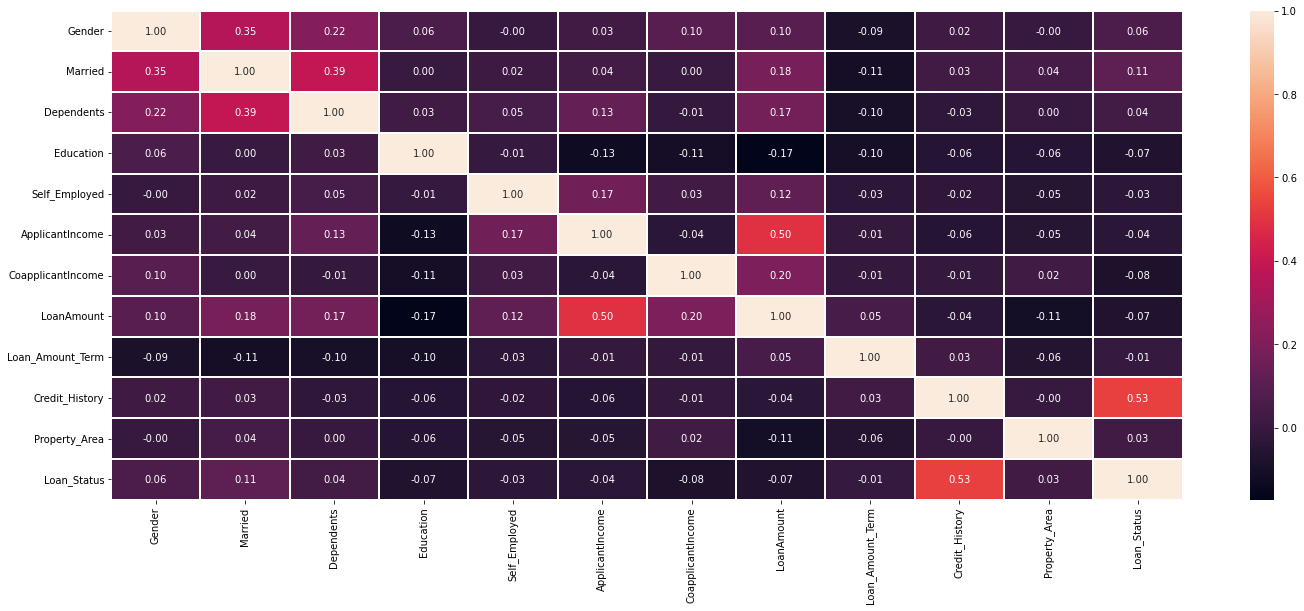

In [20]:
plt.figure(figsize=(24,9))
sns.heatmap(data.corr(),annot=True,linewidth=0.1, fmt ="0.2f")  

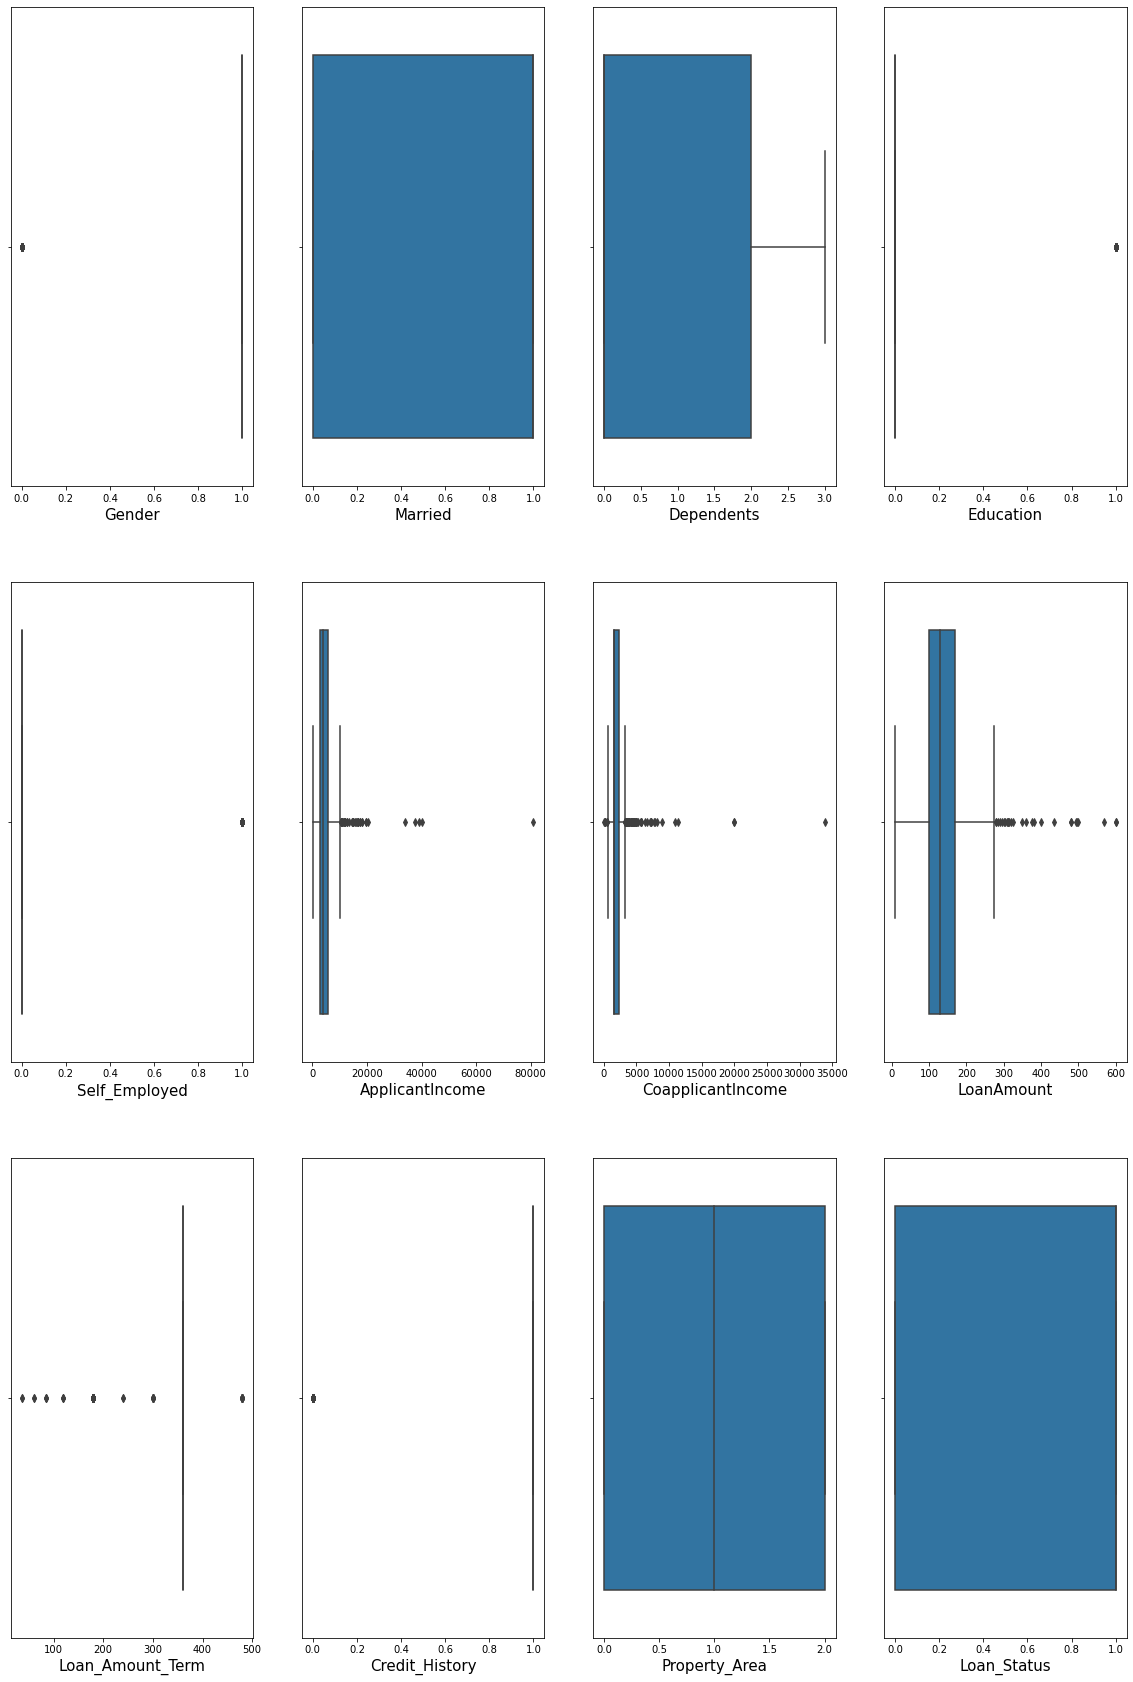

In [21]:
plt.figure(figsize=(20,30))
graph = 1

for column in data:
    if graph<=16:
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [22]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1

In [23]:
app_inc_high = (q3.ApplicantIncome + (1.5*iqr.ApplicantIncome ))
app_inc_high
index = np.where(data['ApplicantIncome']>app_inc_high)
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1.0,1.0,1.0,0.0,0.0,4583,1508.000000,128.0,360.0,1.0,0.0,0.0
1,2,1.0,1.0,0.0,0.0,1.0,3000,1581.093583,66.0,360.0,1.0,2.0,1.0
2,3,1.0,1.0,0.0,1.0,0.0,2583,2358.000000,120.0,360.0,1.0,2.0,1.0
3,4,1.0,0.0,0.0,0.0,0.0,6000,1581.093583,141.0,360.0,1.0,2.0,1.0
4,5,1.0,1.0,2.0,0.0,1.0,5417,4196.000000,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,609,0.0,0.0,0.0,0.0,0.0,2900,1581.093583,71.0,360.0,1.0,0.0,1.0
436,610,1.0,1.0,3.0,0.0,0.0,4106,1581.093583,40.0,180.0,1.0,0.0,1.0
437,611,1.0,1.0,1.0,0.0,0.0,8072,240.000000,253.0,360.0,1.0,2.0,1.0
438,612,1.0,1.0,2.0,0.0,0.0,7583,1581.093583,187.0,360.0,1.0,2.0,1.0


In [24]:
co_inc_high = (q3.CoapplicantIncome + (1.5*iqr.CoapplicantIncome ))
co_inc_high
index = np.where(data['CoapplicantIncome']>co_inc_high)
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1.0,1.0,1.0,0.0,0.0,4583,1508.000000,128.0,360.0,1.0,0.0,0.0
1,2,1.0,1.0,0.0,0.0,1.0,3000,1581.093583,66.0,360.0,1.0,2.0,1.0
2,3,1.0,1.0,0.0,1.0,0.0,2583,2358.000000,120.0,360.0,1.0,2.0,1.0
3,4,1.0,0.0,0.0,0.0,0.0,6000,1581.093583,141.0,360.0,1.0,2.0,1.0
4,6,1.0,1.0,0.0,1.0,0.0,2333,1516.000000,95.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,609,0.0,0.0,0.0,0.0,0.0,2900,1581.093583,71.0,360.0,1.0,0.0,1.0
373,610,1.0,1.0,3.0,0.0,0.0,4106,1581.093583,40.0,180.0,1.0,0.0,1.0
374,611,1.0,1.0,1.0,0.0,0.0,8072,240.000000,253.0,360.0,1.0,2.0,1.0
375,612,1.0,1.0,2.0,0.0,0.0,7583,1581.093583,187.0,360.0,1.0,2.0,1.0


In [25]:
lo_amt_high = (q3.LoanAmount + (1.5*iqr.LoanAmount ))
lo_amt_high
index = np.where(data['LoanAmount']>lo_amt_high)
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1.0,1.0,1.0,0.0,0.0,4583,1508.000000,128.0,360.0,1.0,0.0,0.0
1,2,1.0,1.0,0.0,0.0,1.0,3000,1581.093583,66.0,360.0,1.0,2.0,1.0
2,3,1.0,1.0,0.0,1.0,0.0,2583,2358.000000,120.0,360.0,1.0,2.0,1.0
3,4,1.0,0.0,0.0,0.0,0.0,6000,1581.093583,141.0,360.0,1.0,2.0,1.0
4,6,1.0,1.0,0.0,1.0,0.0,2333,1516.000000,95.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,609,0.0,0.0,0.0,0.0,0.0,2900,1581.093583,71.0,360.0,1.0,0.0,1.0
372,610,1.0,1.0,3.0,0.0,0.0,4106,1581.093583,40.0,180.0,1.0,0.0,1.0
373,611,1.0,1.0,1.0,0.0,0.0,8072,240.000000,253.0,360.0,1.0,2.0,1.0
374,612,1.0,1.0,2.0,0.0,0.0,7583,1581.093583,187.0,360.0,1.0,2.0,1.0


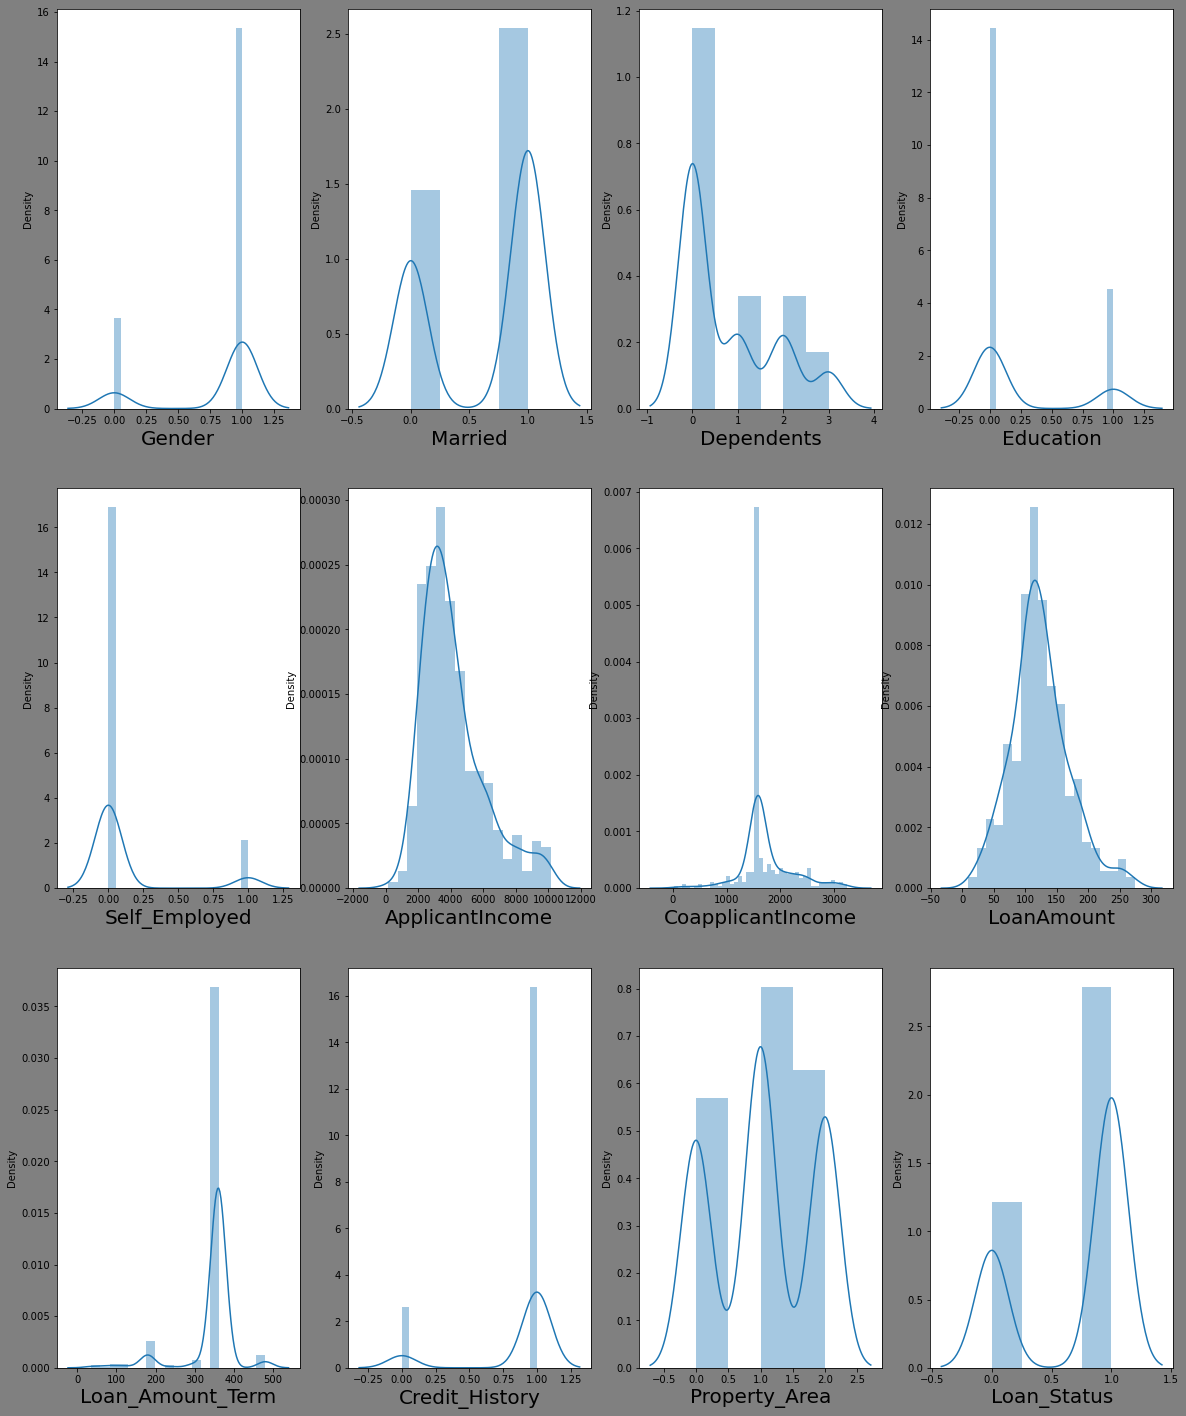

In [26]:
plt.figure(figsize=(20,25),facecolor='grey')
plotnumber = 1
for column in data:
    if plotnumber <14:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [27]:
data.skew()

Gender              -1.574428
Married             -0.565951
Dependents           0.972330
Education            1.226563
Self_Employed        2.475272
ApplicantIncome      1.154681
CoapplicantIncome    0.566506
LoanAmount           0.519812
Loan_Amount_Term    -2.424797
Credit_History      -2.103937
Property_Area       -0.050458
Loan_Status         -0.859798
dtype: float64

In [28]:
x = data.drop('Loan_Status',axis =1)
y = data['Loan_Status']

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.48666426,  0.7571141 ,  0.23057199, ...,  0.24644057,
         0.40061681, -1.33148593],
       [ 0.48666426,  0.7571141 , -0.75459925, ...,  0.24644057,
         0.40061681,  1.25579423],
       [ 0.48666426,  0.7571141 , -0.75459925, ...,  0.24644057,
         0.40061681,  1.25579423],
       ...,
       [ 0.48666426,  0.7571141 ,  0.23057199, ...,  0.24644057,
         0.40061681,  1.25579423],
       [ 0.48666426,  0.7571141 ,  1.21574324, ...,  0.24644057,
         0.40061681,  1.25579423],
       [-2.05480467, -1.32080489, -0.75459925, ...,  0.24644057,
        -2.49615088, -0.03784585]])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [31]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state", i)
        print("Training accuracy score is:", round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy score is:", round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 51
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 136
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 147
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 259
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 355
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 453
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 465
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 488
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 511
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 696
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 


At random state 702
Training accuracy score is: 80.3
Testing accuracy score is: 80.3 




In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=453)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.25      0.08      0.12        26
         1.0       0.65      0.88      0.75        50

    accuracy                           0.61        76
   macro avg       0.45      0.48      0.43        76
weighted avg       0.51      0.61      0.53        76



In [34]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)

In [35]:
for j in range(2,10):
    lsscore = cross_val_score(lr, x,y, cv = j)
    lsc = lsscore.mean()
    print("At cv:", j)
    print("Cross validation score is :", lsc*100)
    print("Accuracy score is :", lss*100)
    print("\n")

At cv: 2
Cross validation score is : 80.58510638297874
Accuracy score is : 80.26315789473685


At cv: 3
Cross validation score is : 80.05714285714286
Accuracy score is : 80.26315789473685


At cv: 4
Cross validation score is : 80.31914893617021
Accuracy score is : 80.26315789473685


At cv: 5
Cross validation score is : 80.32280701754387
Accuracy score is : 80.26315789473685


At cv: 6
Cross validation score is : 80.3336746885134
Accuracy score is : 80.26315789473685


At cv: 7
Cross validation score is : 80.33343316362185
Accuracy score is : 80.26315789473685


At cv: 8
Cross validation score is : 80.85106382978722
Accuracy score is : 80.26315789473685


At cv: 9
Cross validation score is : 80.33939863208155
Accuracy score is : 80.26315789473685




In [36]:
lsscore_selected = cross_val_score(lr, x,y, cv = 8).mean()
print(" The CV score is :",lsscore_selected)
print (" The accuracy_score is :",lss)

 The CV score is : 0.8085106382978723
 The accuracy_score is : 0.8026315789473685
